In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

# Try reading with utf-8 encoding
try:
    dataframe = pd.read_csv("Data.csv", encoding="utf-8")
except UnicodeDecodeError:
    dataframe = pd.read_csv("Data.csv", encoding="ISO-8859-1")  # Alternative encoding

print(dataframe.head())


          name online_order new_customer  rate  approved  \
0  Jowi Center           No           No   2.8        28   
1       Kalama           No           No   3.2        22   
2   Sugar Belt           No          Yes   3.6        39   
3       Pundo            No          Yes   3.6       153   
4   Alot Nyale          Yes          Yes   5.0       146   

   price(for two couples) dish_type  
0                     480  Cocktail  
1                     180  Cocktail  
2                     350  Cocktail  
3                    1500  Cocktail  
4                     920  Cocktail  


## Summary of the dataframe

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   114 non-null    object 
 1   online_order           114 non-null    object 
 2   new_customer           114 non-null    object 
 3   rate                   114 non-null    float64
 4   approved               114 non-null    int64  
 5   cost(for two couples)  114 non-null    int64  
 6   listed_in(type)        114 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.4+ KB


## Favourite Dish

C:\Users\JBwana\AppData\Local\Temp\ipykernel_352\1481040547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['dish_type'], palette="Set2")  # Change palette for different colors


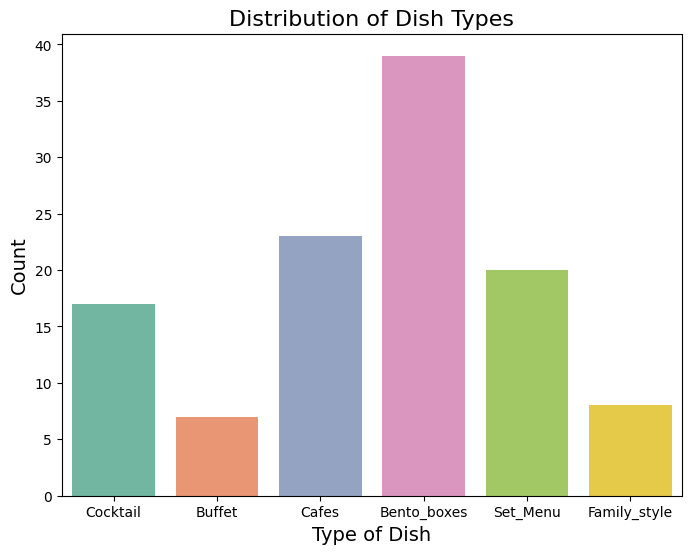

In [10]:

# Set figure size
plt.figure(figsize=(8, 6))

# Create count plot with different colors for each bar
sns.countplot(x=dataframe['dish_type'], palette="Set2")  # Change palette for different colors

# Label the x-axis
plt.xlabel("Type of Dish", fontsize=14)

# Label the y-axis
plt.ylabel("Count", fontsize=14)

# Add title
plt.title("Distribution of Dish Types", fontsize=16)

# Show the plot
plt.show()


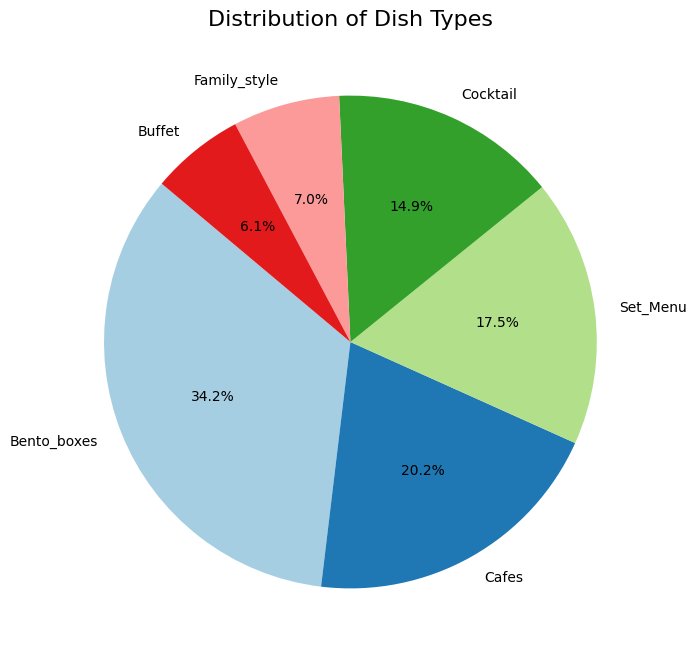

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each dish type
dish_counts = dataframe['dish_type'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(dish_counts, labels=dish_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add Title
plt.title("Distribution of Dish Types", fontsize=16)

# Show Plot
plt.show()


## Approvals per Dish

Text(0, 0.5, 'Approved')

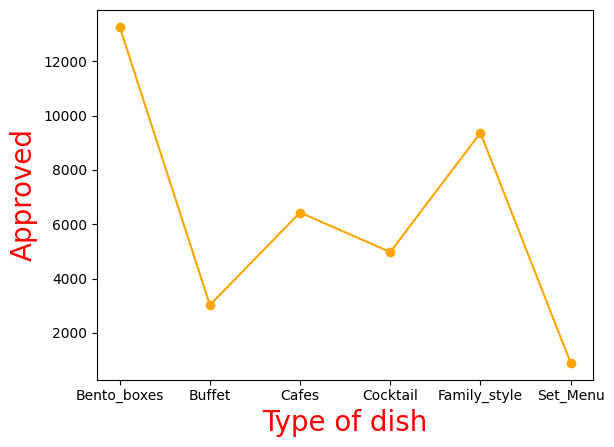

In [17]:
grouped_data = dataframe.groupby('dish_type')['approved'].sum()
result = pd.DataFrame({'agreed': grouped_data})
plt.plot(result, c='orange', marker='o')
plt.xlabel('Type of dish', c='red', size=20)
plt.ylabel('Approved', c='red', size=20)

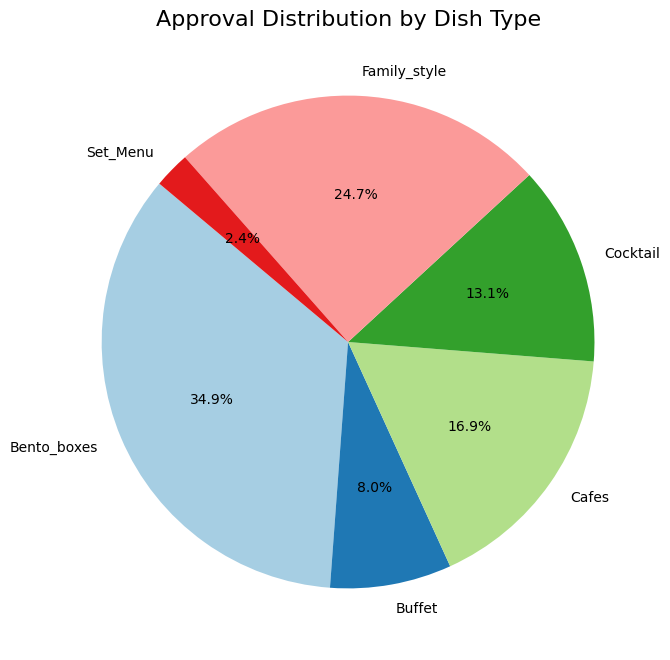

In [18]:
import matplotlib.pyplot as plt

# Group the data by dish_type and sum the 'approved' column
grouped_data = dataframe.groupby('dish_type')['approved'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title("Approval Distribution by Dish Type", fontsize=16)

# Show the plot
plt.show()


## Online Customers

C:\Users\JBwana\AppData\Local\Temp\ipykernel_352\2699642549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=dataframe['online_order'], palette="Set2")


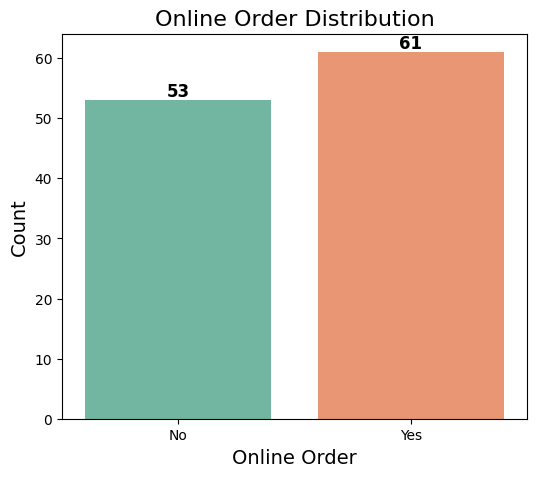

In [21]:

# Set figure size
plt.figure(figsize=(6, 5))

# Create count plot with colors
ax = sns.countplot(x=dataframe['online_order'], palette="Set2")

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Label axes
plt.xlabel("Online Order", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Online Order Distribution", fontsize=16)

# Show the plot
plt.show()


## Rate Distribution

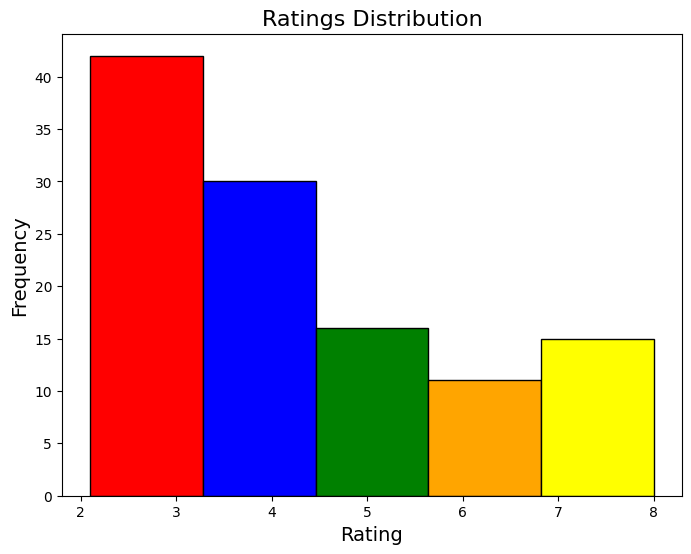

In [27]:
# Define custom colors for the bars
colors = ['red', 'blue', 'green', 'orange', 'yellow']

# Create histogram
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(dataframe['rate'], bins=5, edgecolor='black')

# Assign a different color to each bar
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % len(colors)])  # Cycle through colors

# Add labels and title
plt.title('Ratings Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

## Preferance of Couples

<Axes: xlabel='price(for two couples)', ylabel='count'>

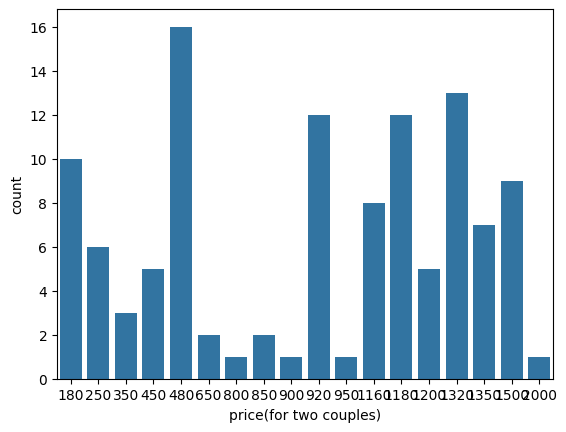

In [28]:
Two_couples=dataframe['price(for two couples)']
sns.countplot(x=Two_couples)

## Most couples in pairs like hotels with prices approximately Ksh 480

## Ratings of Online Orders

C:\Users\JBwana\AppData\Local\Temp\ipykernel_352\2253855691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=dataframe, palette="Set2")  # Change palette for distinct colors


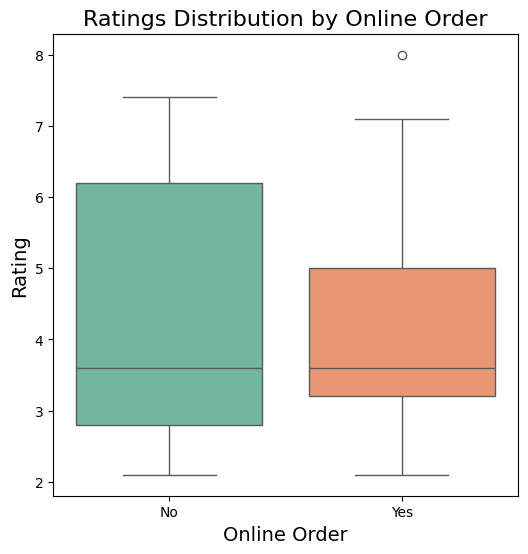

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(6, 6))

# Create a boxplot with different colors for each category
sns.boxplot(x='online_order', y='rate', data=dataframe, palette="Set2")  # Change palette for distinct colors

# Add labels and title
plt.xlabel("Online Order", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.title("Ratings Distribution by Online Order", fontsize=16)

# Show the plot
plt.show()


## Most paired couples do not like online ordering

## Dishes that are mostly ordered online 

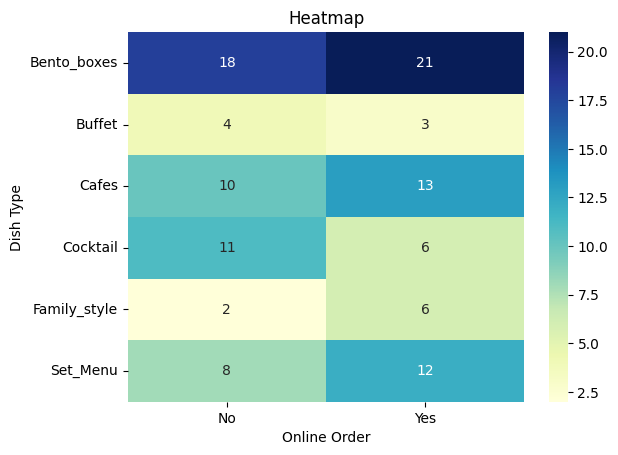

In [31]:
pivot_table = dataframe.pivot_table(index='dish_type', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Dish Type')
plt.show()